# Base de données Entendre la France

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import NLP_plots_models

## Exploration des données: 

### Users:

In [2]:
with open('Donnees/entendre_france/users.csv') as f:
    print(f)

<_io.TextIOWrapper name='Donnees/entendre_france/users.csv' mode='r' encoding='cp1252'>


In [3]:
df_users=pd.read_csv('Donnees/entendre_france/users.csv', encoding='cp1252', delimiter=';')

In [4]:
df_users.sexe[df_users.sexe!='?'].count()

NameError: name 'users' is not defined

In [ ]:
df_users.head()

### tags

In [5]:
with open('Donnees/entendre_france/tags.csv') as f:
    print(f)

<_io.TextIOWrapper name='Donnees/entendre_france/tags.csv' mode='r' encoding='cp1252'>


In [6]:
df_tags=pd.read_csv('Donnees/entendre_france/tags.csv', encoding='utf8', delimiter=';')

In [7]:
df_tags.tag.nunique()

257

In [8]:
df_tags.head()

,contribution,customer_id,tag,corpus,question,count
0,42431,38893,Diminution salaires et suppression des avantag...,Les dépenses du gouvernement et les dépenses a...,FI9,1
1,13610,23722,Développement voiture électrique,Il faut arrêter certaines taxes et accompagner...,TE13,1
2,30293,33840,Plus de transparence,Une plus grande transparence dans l'utilisatio...,FI7,1
3,12847,22934,"Lutte évasion, fraude, optimisation",Mieux lutter contre la fraude interdire les pa...,FI8,1
4,4001,22938,vote obligatoire,Rendre le vote obligatoire,DC11,1


### Questions

In [9]:
df_questions=pd.read_csv('Donnees/entendre_france/matching_questions.csv', encoding='utf8', delimiter=';')

In [10]:
df_questions.head()

,question_id,type,theme,title
0,TE1,QCM,Transition écologique,🌎Q1 - Quel est aujourd’hui pour vous le problè...
1,TE2,QCM,Transition écologique,"🌎Q2 - À titre personnel, pensez-vous pouvoir c..."
2,TE3,QCM,Transition écologique,🌎Q3 - Pensez-vous que vos actions en faveur de...
3,TE4,QCM,Transition écologique,🌎Q4 - Diriez-vous que vous connaissez les aide...
4,TE5,QCM,Transition écologique,🌎Q5 - Avez-vous pour vos déplacements quotidie...


In [11]:
df_questions.head()

,question_id,type,theme,title
0,TE1,QCM,Transition écologique,🌎Q1 - Quel est aujourd’hui pour vous le problè...
1,TE2,QCM,Transition écologique,"🌎Q2 - À titre personnel, pensez-vous pouvoir c..."
2,TE3,QCM,Transition écologique,🌎Q3 - Pensez-vous que vos actions en faveur de...
3,TE4,QCM,Transition écologique,🌎Q4 - Diriez-vous que vous connaissez les aide...
4,TE5,QCM,Transition écologique,🌎Q5 - Avez-vous pour vos déplacements quotidie...


### matching_answers

In [12]:
df_matching_a=pd.read_csv('Donnees/entendre_france/matching_answers_qcm.csv', encoding='utf8', delimiter=';')

In [13]:
df_matching_a.head()

,question_id,answer_id,answer_title
0,TE1,1️⃣,La pollution de l'air
1,TE1,2️⃣,"Les dérèglements climatiques (crue, sécheresse)"
2,TE1,3️⃣,L’érosion du littoral
3,TE1,4️⃣,La biodiversité et la disparition de certaines...
4,TE1,5️⃣,Autres


In [14]:
df_matching_a.answer_id[df_matching_a.answer_id=='4️⃣'].count()

26

### Free

In [5]:
df_free=pd.read_csv('Donnees/entendre_france/answers_free.csv', encoding='utf8', delimiter=';')

In [6]:
df_free.shape

(53908, 3)

In [7]:
df_free.user_id.nunique()

10251

In [8]:
df_free.head()

,user_id,question_id,answer
0,17943,DC11,Dites leur la vérité. Si une situation est jug...
1,17965,DC11,Rendre la politique intéressante
2,17971,DC11,"Plus d'éducation civique, y compris au lycée. ..."
3,17974,DC11,Information du citoyen + vote oblugatoire
4,18019,DC11,Qu'il arrête leur connerie comme les 80km/h


### TODO : 

~~Rassembler les écrits de chaque participant~~

~~Merger écrits/données participants~~

Utiliser le genre en target ? 

Utiliser aussi le genre sur les données twitter

Utiliser la base d'entendre la France comme base de test

## Join free/users

In [19]:
df_users.head()

,user_id,code_postal,commune,type_commune,nom_departement,departement,sexe,age,formation,profession,taille_org,position_gj
0,17469,?,?,?,?,?,Homme,?,?,?,?,?
1,17767,75011,PARIS 11 (75),Urbain,Paris (75),75,Homme,?,?,?,?,?
2,17816,13200,ARLES (13),Urbain,Bouches-du-RhÃ´ne (13),13,Homme,25-34 ans,Bac +4/5,"Cadre, profession intellectuelle",Plus de 5000,Ne soutient pas
3,17941,?,?,?,?,?,?,?,?,?,?,?
4,17942,?,?,?,?,?,?,?,?,?,?,?


In [20]:
df_free.head()

,user_id,question_id,answer
0,17943,DC11,Dites leur la vérité. Si une situation est jug...
1,17965,DC11,Rendre la politique intéressante
2,17971,DC11,"Plus d'éducation civique, y compris au lycée. ..."
3,17974,DC11,Information du citoyen + vote oblugatoire
4,18019,DC11,Qu'il arrête leur connerie comme les 80km/h


### Une seule ligne pour chaque user :

In [21]:
df_free.user_id.nunique()

10251

In [22]:
df_free.shape[0]

53908

On rassemble toutes les contributions d'un auteur unique sur une seule ligne:

In [23]:
df_unique_free=df_free.groupby('user_id')['answer'].apply(' '.join).reset_index()

On vérfie que le résultat est le bon:

In [24]:
#Nombre de user_id uniques dans df_free:
df_free.user_id.nunique()

10251

In [25]:
#Taille de df_unique_free:
df_unique_free.shape

(10251, 2)

Le résultat est bon. 

In [26]:
df_unique_free.head()

,user_id,answer
0,17816,C’est un point essentiel selon moi. Communique...
1,17942,Le regard &&De l hautre &&De ce qu il fait Un ...
2,17943,Dites leur la vérité. Si une situation est jug...
3,17947,Rendre les actes ou paroles homophobe plus con...
4,17948,Les conditions sont alarmique avec tout ces pe...


### Rassembler écrits et infos des utilisateurs: 

In [27]:
df_users.user_id=df_users.user_id.astype('int64')

In [28]:
df_unique_free.user_id=df_unique_free.user_id.astype('int64')

In [29]:
df_info_free = pd.merge(df_unique_free, df_users,left_on='user_id', right_on='user_id', how='left')

In [30]:
df_info_free.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10251 entries, 0 to 10250
Data columns (total 13 columns):
user_id            10251 non-null int64
answer             10251 non-null object
code_postal        10055 non-null object
commune            10055 non-null object
type_commune       10055 non-null object
nom_departement    10055 non-null object
departement        10055 non-null object
sexe               10055 non-null object
age                10055 non-null object
formation          10055 non-null object
profession         10055 non-null object
taille_org         10055 non-null object
position_gj        10055 non-null object
dtypes: int64(1), object(12)
memory usage: 1.1+ MB


In [31]:
df_info_free[df_info_free.code_postal.isna()].shape

(196, 13)

Il y a 196 user_id qui sont dans la base des réponses 'free' mais pas dans la base des utilisateurs (avec leurs informations associées). 

N'ayant d'autre choix, on les supprime. 

In [38]:
df_info_free = pd.merge(df_unique_free, df_users,left_on='user_id', right_on='user_id', how='inner')

In [40]:
df_info_free.shape

(10055, 13)

In [41]:
df_info_free.head()

,user_id,answer,code_postal,commune,type_commune,nom_departement,departement,sexe,age,formation,profession,taille_org,position_gj
0,17816,C’est un point essentiel selon moi. Communique...,13200,ARLES (13),Urbain,Bouches-du-RhÃ´ne (13),13,Homme,25-34 ans,Bac +4/5,"Cadre, profession intellectuelle",Plus de 5000,Ne soutient pas
1,17942,Le regard &&De l hautre &&De ce qu il fait Un ...,?,?,?,?,?,?,?,?,?,?,?
2,17943,Dites leur la vérité. Si une situation est jug...,10000,TROYES (10),Urbain,Aube (10),10,?,45-54 ans,?,Sans activitÃ©,?,Ne soutient pas
3,17947,Rendre les actes ou paroles homophobe plus con...,?,?,?,?,?,?,?,?,?,?,?
4,17948,Les conditions sont alarmique avec tout ces pe...,3320,POUZY MESANGY (3),Rural,Allier (3),3,?,45-54 ans,?,?,?,Soutient


On remplace les '?' par des nans: 

In [42]:
df_info_free.replace({'?' : np.nan}, inplace=True)

### Saving :

In [52]:
df_info_free.to_csv('Donnees_clean/Entendre_La_France/info_free.csv',index=False)

### Analyse des informations de la base de données

In [9]:
df_info_free=pd.read_csv('Donnees_clean/Entendre_La_France/info_free.csv')

In [10]:
df_info_free.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10055 entries, 0 to 10054
Data columns (total 13 columns):
user_id            10055 non-null int64
answer             10055 non-null object
code_postal        8188 non-null float64
commune            8188 non-null object
type_commune       8106 non-null object
nom_departement    8188 non-null object
departement        8188 non-null object
sexe               8334 non-null object
age                7496 non-null object
formation          5665 non-null object
profession         5792 non-null object
taille_org         2506 non-null object
position_gj        5516 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 1021.3+ KB


#### Sexes:

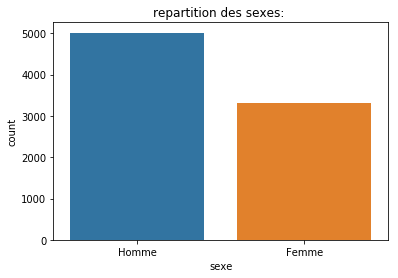

In [15]:
plt.title('repartition des sexes: ')
sns.countplot(df_info_free.sexe)
plt.show()

#### Ages:

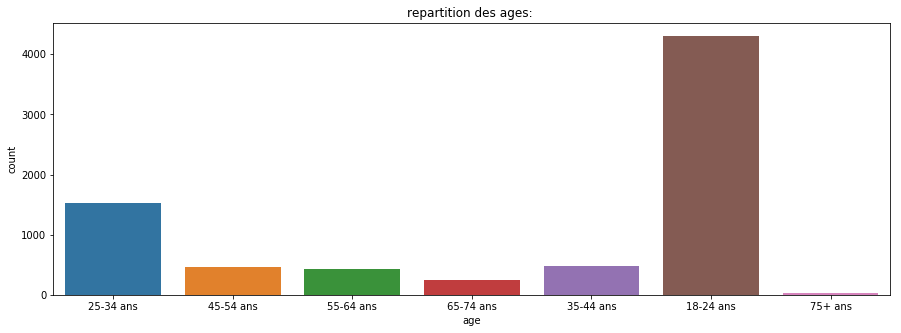

In [12]:
fig=plt.figure(figsize=(15,5))
plt.title('repartition des ages: ')
sns.countplot(df_info_free.age)
plt.show()

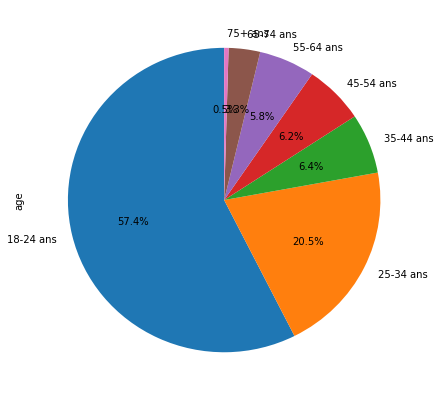

True

In [13]:
NLP_plots_models.partis_pie_chart(df_info_free.age)

#### Position Gilets Jaunes:

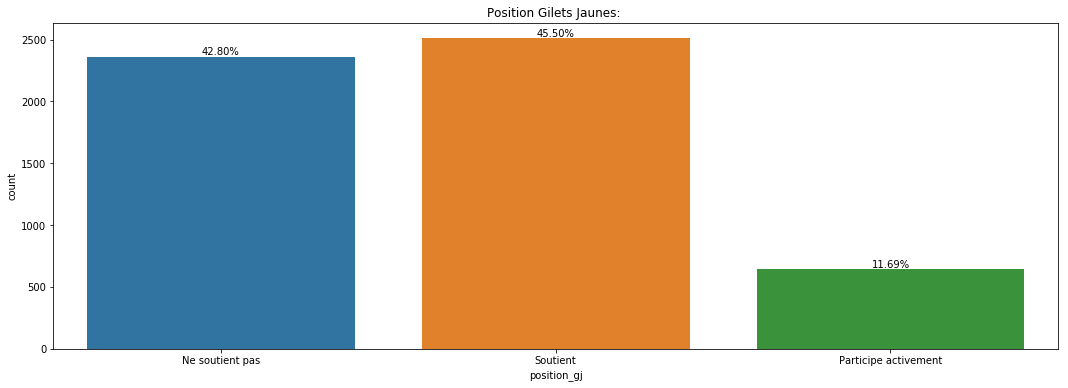

In [51]:
fig, ax = plt.subplots(figsize=(18,6))        
ax = sns.countplot(df_info_free.position_gj)
#ax.set_yscale('log')
ax.set_title('Position Gilets Jaunes: ')
#------ Ajouter les densités : -----
#https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
ncount = len(df_info_free.position_gj.dropna())
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), ha='center', va='bottom') # set the alignment of the text
#----------
plt.show()

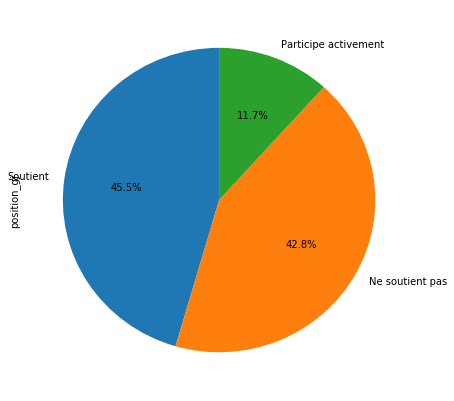

True

In [14]:
NLP_plots_models.partis_pie_chart(df_info_free.position_gj)

#### Formation

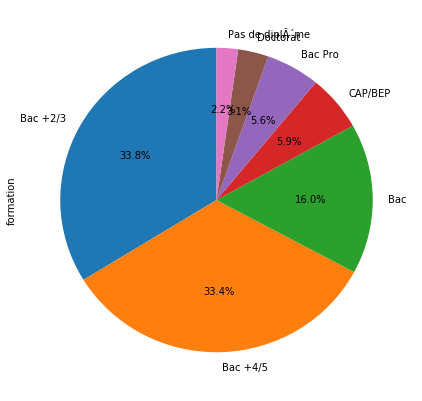

True

In [16]:
NLP_plots_models.partis_pie_chart(df_info_free.formation)

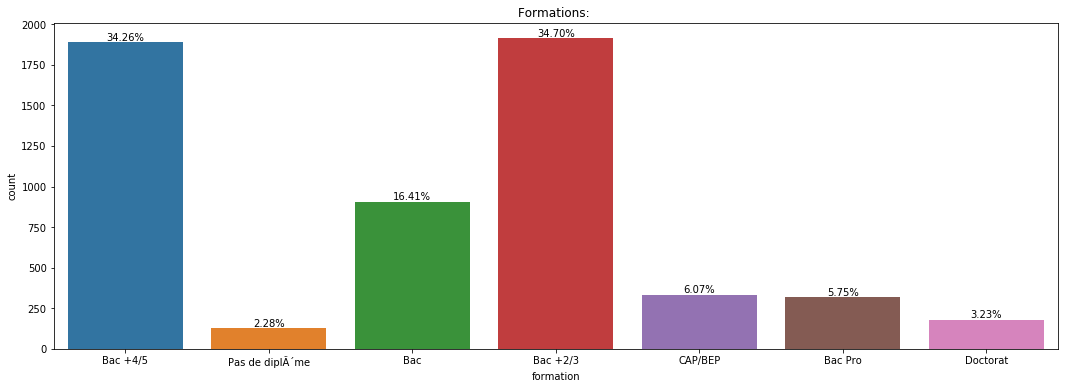

In [19]:
fig, ax = plt.subplots(figsize=(18,6))        
ax = sns.countplot(df_info_free.formation)
#ax.set_yscale('log')
ax.set_title('Formations: ')
#------ Ajouter les densités : -----
#https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
ncount = len(df_info_free.position_gj.dropna())
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), ha='center', va='bottom') # set the alignment of the text
#----------
plt.show()

#### Profession:

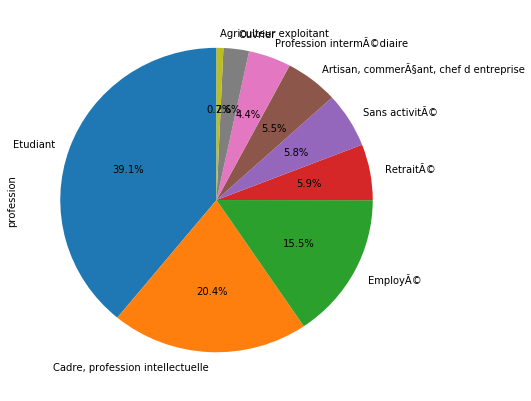

True

In [17]:
NLP_plots_models.partis_pie_chart(df_info_free.profession)

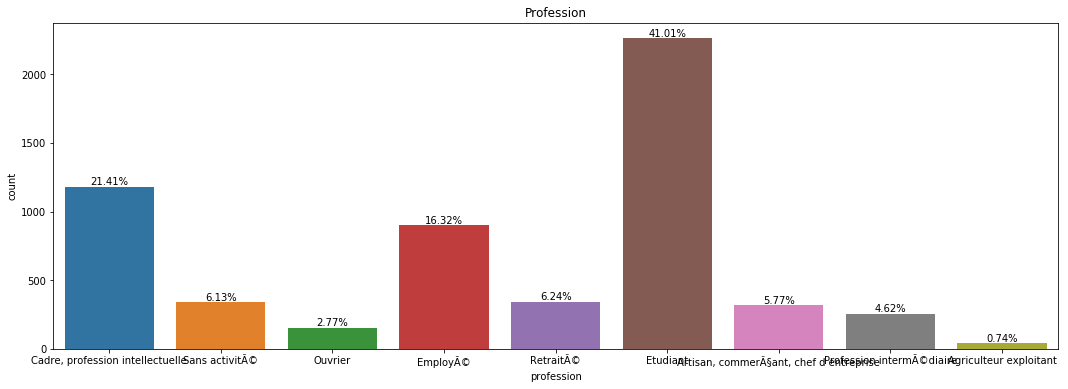

In [20]:
fig, ax = plt.subplots(figsize=(18,6))        
ax = sns.countplot(df_info_free.profession)
#ax.set_yscale('log')
ax.set_title('Profession')
#------ Ajouter les densités : -----
#https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
ncount = len(df_info_free.position_gj.dropna())
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), ha='center', va='bottom') # set the alignment of the text
#----------
plt.show()